In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Read the data
data = pd.read_csv('./data.csv')

### Inspect the data

In [58]:
data.head()

,Tidsmerke,Hvilken øvingsforelesning følger du?,"Hvor i ""øvingskalenderen"" ønsker du øvingsforelesningen skal være?\n\nGitt at innlevering for øving 2 er fredag i uke 2, og innlevering for øving 3 er fredag i uke 3.",Hvordan synes du tiden til å løse oppgaver i øvingsforelesningen er?
0,2022/09/02 2:18:40 p.m. EET,Fredag,Øvingsforelesning fredag uke 2 og mandag uke 3...,3.0
1,2022/09/02 2:18:46 p.m. EET,Fredag,Øvingsforelesning fredag uke 1 og mandag uke 2...,3.0
2,2022/09/02 2:18:57 p.m. EET,Fredag,"Blanding av de to forrige alternativene, 50% i...",3.0
3,2022/09/02 2:18:59 p.m. EET,Fredag,Øvingsforelesning fredag uke 2 og mandag uke 3...,1.0
4,2022/09/02 2:19:01 p.m. EET,Fredag,Øvingsforelesning fredag uke 2 og mandag uke 3...,3.0


### Rename columns

In [59]:
data.columns = ['timestamp', 'forelesning', 'alternativ', 'oppgavetid']
data.head()

,timestamp,forelesning,alternativ,oppgavetid
0,2022/09/02 2:18:40 p.m. EET,Fredag,Øvingsforelesning fredag uke 2 og mandag uke 3...,3.0
1,2022/09/02 2:18:46 p.m. EET,Fredag,Øvingsforelesning fredag uke 1 og mandag uke 2...,3.0
2,2022/09/02 2:18:57 p.m. EET,Fredag,"Blanding av de to forrige alternativene, 50% i...",3.0
3,2022/09/02 2:18:59 p.m. EET,Fredag,Øvingsforelesning fredag uke 2 og mandag uke 3...,1.0
4,2022/09/02 2:19:01 p.m. EET,Fredag,Øvingsforelesning fredag uke 2 og mandag uke 3...,3.0


### Clean up alternatives

In [60]:
alt1 = 'Øvingsforelesning fredag uke 1 og mandag uke 2 med tema knyttet til øving 3 (11 dager fra mandags-øf til innlevering. 14 dager fra fredags-øf))'
alt2 = 'Øvingsforelesning fredag uke 2 og mandag uke 3 med tema knyttet til øving 3 (bare 4 dager fra mandags-øf til innlevering. 7 dager fra fredags-øf)'
alt3 = 'Blanding av de to forrige alternativene, 50% innhold til øvingen som har innlevering om under en uke, og 50% innhold til neste.'

In [61]:
data.loc[data['alternativ'] == alt1, 'alternativ'] = 1
data.loc[data['alternativ'] == alt2, 'alternativ'] = 2
data.loc[data['alternativ'] == alt3, 'alternativ'] = 3

In [62]:
data_fredag = data[data['forelesning'] == 'Fredag']
data_mandag = data[data['forelesning'] == 'Mandag - Fysisk']
data_digital = data[data['forelesning'] == 'Mandag - Digital']

### Looks better now

In [63]:
data_fredag.head()

,timestamp,forelesning,alternativ,oppgavetid
0,2022/09/02 2:18:40 p.m. EET,Fredag,2,3.0
1,2022/09/02 2:18:46 p.m. EET,Fredag,1,3.0
2,2022/09/02 2:18:57 p.m. EET,Fredag,3,3.0
3,2022/09/02 2:18:59 p.m. EET,Fredag,2,1.0
4,2022/09/02 2:19:01 p.m. EET,Fredag,2,3.0


# Plot some stuff

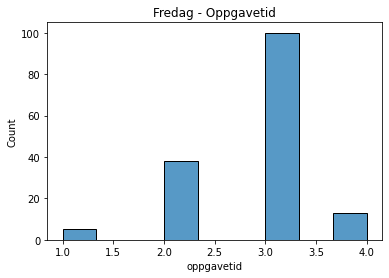

In [64]:
sns.histplot(data_fredag['oppgavetid']).title.set_text('Fredag - Oppgavetid')

plt.show()

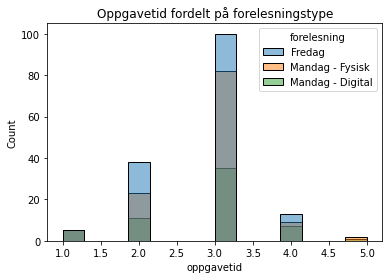

In [65]:
sns.histplot(data, x='oppgavetid', hue='forelesning').title.set_text('Oppgavetid fordelt på forelesningstype')

plt.show()

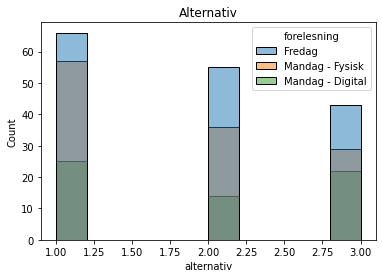

In [66]:
sns.histplot(data, x='alternativ', hue='forelesning').title.set_text('Alternativ')

plt.show()

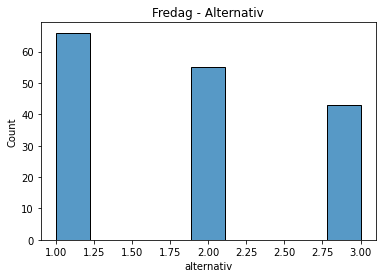

In [67]:
sns.histplot(data_fredag['alternativ']).title.set_text('Fredag - Alternativ')

plt.show()

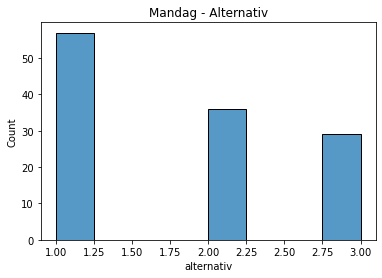

In [68]:
sns.histplot(data_mandag['alternativ']).title.set_text('Mandag - Alternativ')

plt.show()

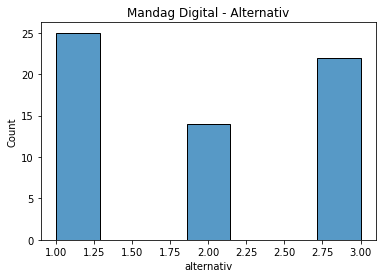

In [69]:
sns.histplot(data_digital['alternativ']).title.set_text('Mandag Digital - Alternativ')

plt.show()